In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

In [2]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-tsuzoj/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-tsuzoj/olist_orders_dataset.csv', 
                    parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                                     'order_delivered_customer_date', 'order_estimated_delivery_date'])
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-tsuzoj/olist_order_items_dataset.csv',
                   parse_dates = ['shipping_limit_date'])

Взглянем на наши данные, посмотрим на размерность таблиц, наличие промущенных значений, наличие дубликатов. Проверим правильно ли у нас спарсились колонки со временем.

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers.duplicated().sum()

0

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
orders.shape

(99441, 8)

In [9]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
orders.duplicated().sum()

0

In [12]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
items.shape

(112650, 7)

In [15]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
items.duplicated().sum()

0

Заранее создадим датафрейм, в котором будут лежать данные по необходимым нам стобцам.

In [17]:
customers_df = customers[['customer_id', 'customer_unique_id']]
customers_df.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


In [18]:
orders_df = orders[['order_id', 'customer_id', 'order_status',
                    'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
orders_df = orders_df.rename(columns = {'order_purchase_timestamp' : 'order_purchase',
                                       'order_delivered_customer_date' : 'order_delivered',
                                       'order_estimated_delivery_date' : 'estimated_delivery_date'})

#Удалим часы, минуты и секунды в стобцах order_purchase и order_delivered
orders_df['order_purchase'] = pd.to_datetime(orders_df['order_purchase'].dt.date)
orders_df['order_delivered'] = pd.to_datetime(orders_df['order_delivered'].dt.date)

# Также сразу добавлю столбы с датой, когда был совершен первый заказ и и первая доставка
orders_df['purchase_date'] = pd.to_datetime(orders_df.order_purchase.dt.strftime('%Y-%m-01'))
orders_df['delivered_date'] = pd.to_datetime(orders_df.order_delivered.dt.strftime('%Y-%m-01'))

orders_df.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01


In [19]:
items_df = items.groupby(['order_id', 'product_id', 'price'], as_index=False) \
                .agg({'order_item_id': 'count'}) \
                .rename(columns = {'order_item_id' : 'quantity'})
items_df.head()             

,order_id,product_id,price,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,1


Смерджим датафреймы orders_df и items_df

In [20]:
df_merged = orders_df.merge(items_df, how='left', on='order_id')
df_merged.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0


Теперь смерджим получившийся датафрейм с customers_df

In [21]:
df_merged = df_merged.merge(customers_df, how='left', on='customer_id')
df_merged.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6


In [22]:
df_merged.shape

(103200, 12)

1. Сколько у нас пользователей, которые совершили покупку только один раз?

Покупкой будем считать наличие чека (внезависимости от того, что в чеке может находится несколько предметов) и заказы со статусом delivered.

In [23]:
task_1 = df_merged.copy()

In [24]:
task_1.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6


In [25]:
# Сгруппируем датафрейм по customer_unique_id и посчитаем количество заказов, сделанных конкретным пользователем.
df_purchase_count = task_1.query('order_status == "delivered"') \
                             .groupby('customer_unique_id', as_index = False) \
                             .agg({'order_id' : 'nunique'}) \
                             .rename(columns = {'order_id' : 'purchase_count'})
df_purchase_count.head()

,customer_unique_id,purchase_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [26]:
# Считаем количество пользователей, сделавших покупку только 1 раз.
df_purchase_count_onetime = df_purchase_count.query('purchase_count == 1')
len(df_purchase_count_onetime)

90557

In [27]:
# Также посчитаем сколько пользователей сделало 1 заказ и сколько пользователей сделали > 1 заказа. 
df_purchase_count['purchase_count'] = np.where(df_purchase_count['purchase_count'] == 1, '1', '>1')
orders_count = df_purchase_count['purchase_count'].value_counts()

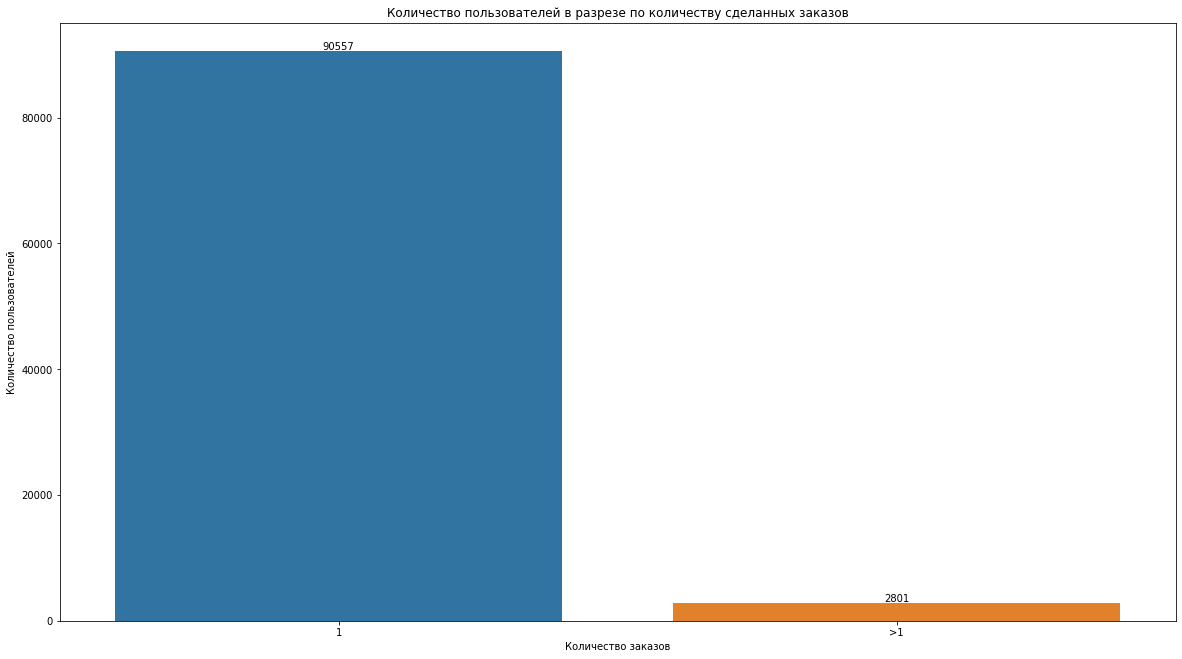

In [28]:
# Также провизуализируем полученный результат.
fig, ax = plt.subplots(figsize=(20, 11))

sns.countplot(data=df_purchase_count, x='purchase_count')

# Воспользуемся функцией annotate для добавления текстовой подписи с количеством над каждым столбцом диаграммы.
for i, count in enumerate(orders_count):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Количество заказов')
ax.set_title('Количество пользователей в разрезе по количеству сделанных заказов');

Вывод: Большая часть пользователей совершает ровно 1 заказ.

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [29]:
dont_delivered_orders = df_merged.copy()
dont_delivered_orders.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6


In [30]:
# Создадим колонку month для хранения информации о годе и месяце доставки заказа.
dont_delivered_orders['month'] = dont_delivered_orders['estimated_delivery_date'].dt.month

In [31]:
dont_delivered_orders.groupby('order_status')['order_id'].count().sort_values(ascending = False)

order_status
delivered      100196
shipped          1128
canceled          629
unavailable       610
invoiced          324
processing        306
created             5
approved            2
Name: order_id, dtype: int64

Из полученной выше серии видно, что большая часть заказов доставлена юзерам (delivered), соответственно их рассматривать не будем. Также у нас имеется 1128 отгруженных заказов, находящихся в процессе доставки. Созданные, подтвержденные, находящиеся в процессе сборки и ожидающие оплаты рассматривать не будем. Поэтому оценим количество заказов со статусом canceled и unavailable в разрезе по месяцам

In [32]:
# Создадим ДФ в котором будет посчитано количество заказов по месяцам, которые не доставляются по разным причинам.
dont_delivered_orders_by_month = dont_delivered_orders.query('order_status == "canceled" | order_status == "unavailable"') \
               .groupby(['month', 'order_status'], as_index = False) \
               .agg({'order_id' : 'count'}) \
               .sort_values('month') \
               .rename(columns={'order_id' : 'orders_count'})
dont_delivered_orders_by_month.head()

,month,order_status,orders_count
0,1,canceled,7
1,1,unavailable,44
2,2,canceled,34
3,2,unavailable,42
4,3,canceled,114


In [33]:
# Теперь создадим ДФ, в котором будет рассчитано среднее количество не доставляемых заказов в месяц
dont_delivered_orders_avg = dont_delivered_orders_by_month.groupby('month', as_index = False) \
                                         .agg({'orders_count' : 'mean'})

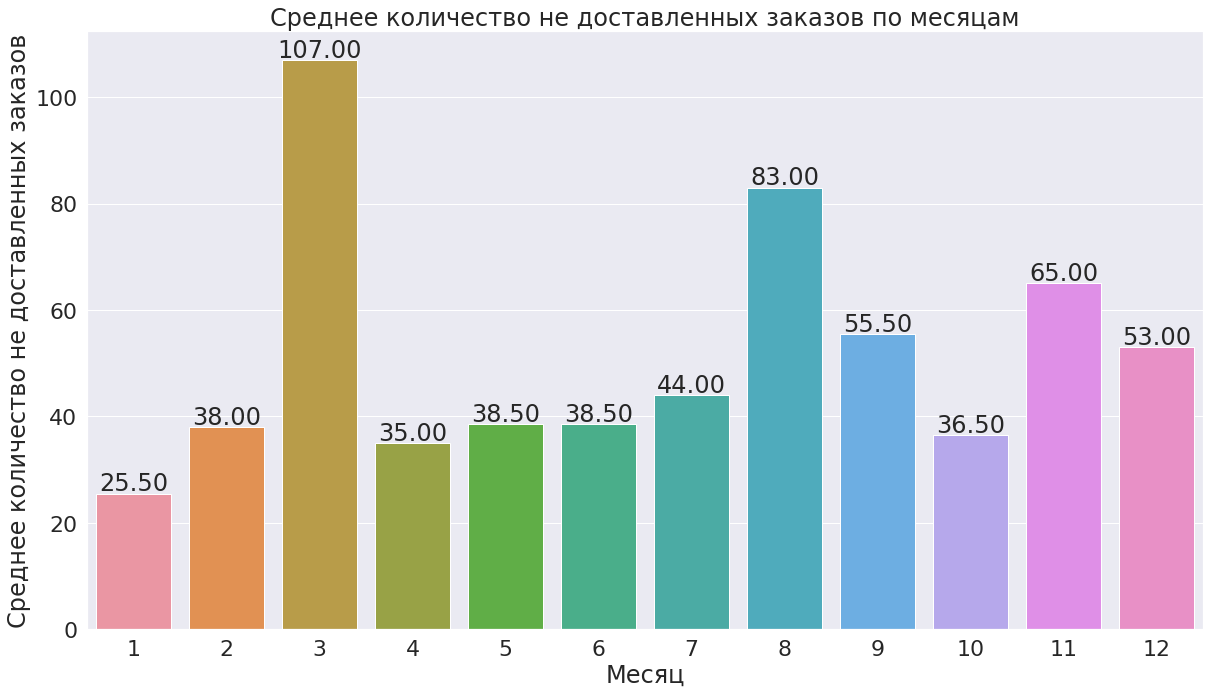

In [34]:
# Визуализируем среднее количество заказов не доставленных по разным причинам в месяц
sns.set(font_scale= 2)
fig, ax = plt.subplots(figsize=(20, 11))
ax = sns.barplot(x=dont_delivered_orders_avg.month, 
                 y=dont_delivered_orders_avg.orders_count)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Месяц')
plt.ylabel('Среднее количество не доставленных заказов')
plt.title('Среднее количество не доставленных заказов по месяцам');

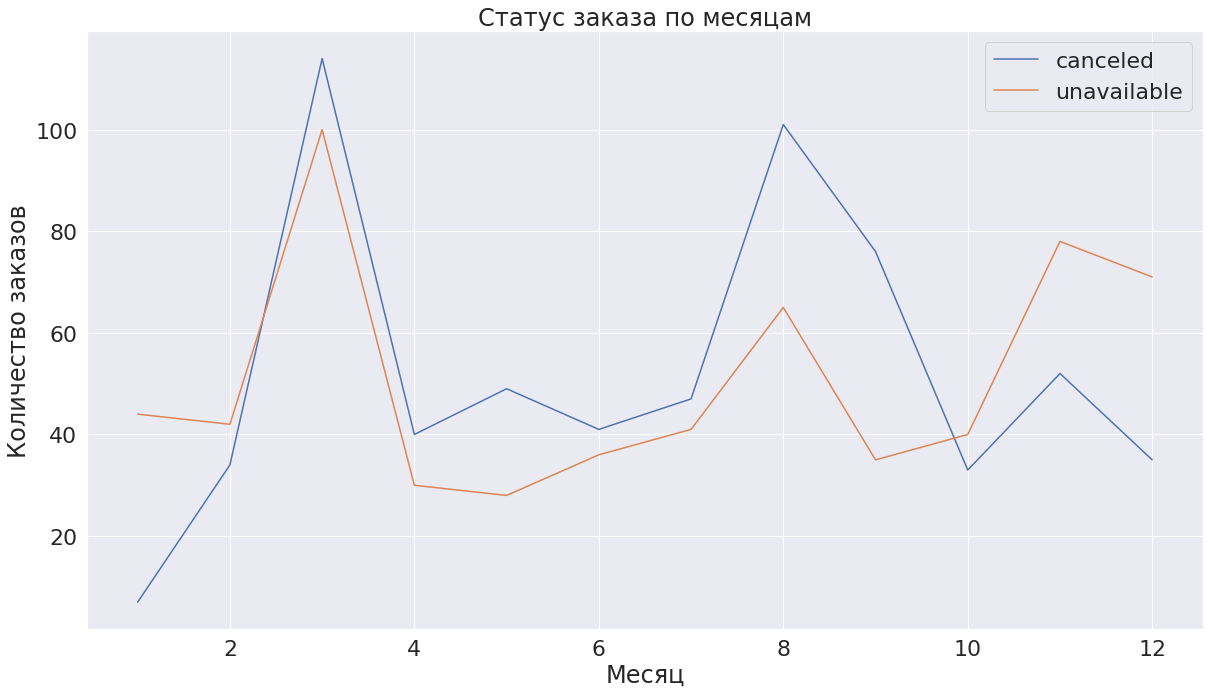

In [35]:
# Визуализируем детализацию по причинам 
fig, ax = plt.subplots(figsize=(20, 11))
sns.lineplot(data = dont_delivered_orders_by_month, x="month", y="orders_count", hue="order_status")
ax.legend(loc='upper right')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Статус заказа по месяцам');

In [36]:
dont_delivered_orders_by_month = dont_delivered_orders_by_month.pivot(index = 'month', columns = 'order_status', values = 'orders_count')
dont_delivered_orders_by_month

order_status,canceled,unavailable
month,,
1,7,44
2,34,42
3,114,100
4,40,30
5,49,28
6,41,36
7,47,41
8,101,65
9,76,35


In [37]:
# Рассчитаем среднее количество заказов в месяц, которые не доставляются.
dont_delivered_orders_by_month.mean().round()

order_status
canceled       52.0
unavailable    51.0
dtype: float64

Вывод: в среднем количество заказов со статусом canceled практически равняется количеству заказов со статусом unavailable

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [38]:
# Как ранее уже упоминалось, покупкой будем считать доставленные заказы, поэтому создадим дф, в котором будут храниться именно такие заказы.
day_number_df = df_merged.copy().query('order_status == "delivered"')
day_number_df.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6


In [39]:
# Создадим колонку с днями недели
day_number_df['weekday'] = day_number_df.order_purchase.dt.day_name()

In [40]:
# Сгруппируем датафрейм по ид товара и дню недели и посчитаем количество проданных товаров.
product_day_count = day_number_df.groupby(['product_id', 'weekday'], as_index = False).agg({'order_id' : 'count'})

In [41]:
# Теперь найдем товары, которые покупаются чаще всего
product_day_max = product_day_count.groupby('product_id', as_index = False).agg({'order_id' : 'max'})
product_day_max

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,1
32212,fff81cc3158d2725c0655ab9ba0f712c,1
32213,fff9553ac224cec9d15d49f5a263411f,1
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


In [42]:
# Объединим полученные результаты в один датафрейм
most_purchased_day = pd.merge(product_day_max, product_day_count, on = ['product_id', 'order_id'], how = 'left')

In [43]:
# Во время объединения могли возникнуть дубликаты по product_id т.к. в разные дни могло покупаться одинаковое количество
# этих товаров, поэтому удалим дубликаты
most_purchased_day = most_purchased_day.drop_duplicates(subset = ('product_id')).rename(columns = {'order_id' : 'max_order_value'})
most_purchased_day.sort_values('max_order_value', ascending = False)

,product_id,max_order_value,weekday
25661,99a4788cb24856965c36a24e339b6058,86,Monday
28768,aca2eb7d00ea1a7b8ebd4e68314663af,75,Thursday
14122,53b36df67ebb7c41585e8d54d6772e08,70,Tuesday
11229,422879e10f46682990de24d770e7f83d,58,Thursday
35335,d1c427060a0f73f6b889a5c7c61f2ac4,58,Monday
...,...,...,...
15956,5ea060e5498eaeee39d5dc4b4525b7ac,1,Wednesday
15955,5e9f7e47bbd1cf91d9a98ed9fdaf6193,1,Wednesday
15954,5e9a6c707458f23644bb74a8b9c53222,1,Wednesday
15953,5e98eec44c208da92f2b66345586a229,1,Tuesday


Полученный ДФ является ответом на вопрос задания №3. Однако, если визуализировать полученнй результат на графике, то получится не информативный результат. Поэтому сделаем визуализацию просто по дням недели и сумме заказанных товаров.

In [44]:
# Сгруппируемся по дням недели и добавим новую колонку, в которой будут храниться номера дней недели для последующей сортировки
most_purchased_day = most_purchased_day.groupby('weekday', as_index = False).agg({'max_order_value' : 'sum'})
most_purchased_day['day_number'] = pd.Series([5, 1, 6, 7, 4, 2, 3])
most_purchased_day = most_purchased_day.sort_values('day_number')

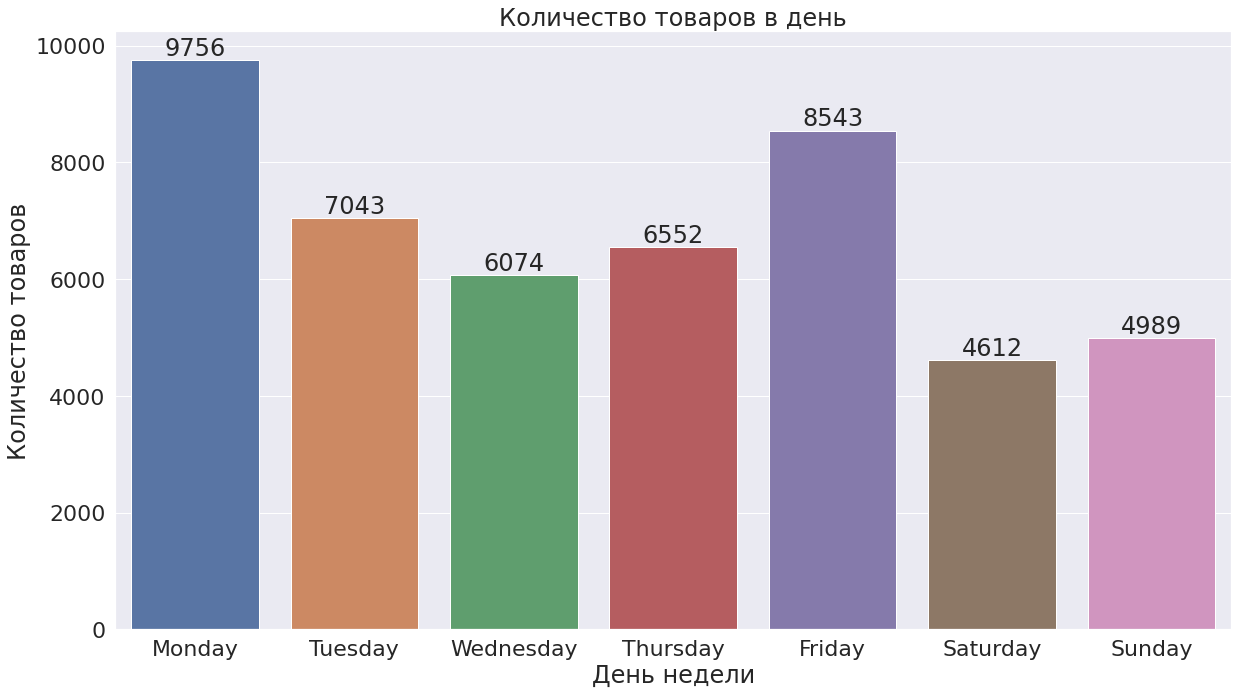

In [45]:
# Визуализируем полученные результаты
fig, ax = plt.subplots(figsize=(20, 11))

sns.barplot(data = most_purchased_day, x = 'weekday', y = 'max_order_value')

# Воспользуемся функцией annotate для добавления текстовой подписи с количеством над каждым столбцом диаграммы.
for i in range(len(most_purchased_day)):
    plt.text(i, most_purchased_day.max_order_value.iloc[i], most_purchased_day.max_order_value.iloc[i], ha='center', va='bottom')

plt.title('Количество товаров в день')
plt.xlabel('День недели')
plt.ylabel('Количество товаров');

Вывод: наибольшее количество товаров покупается в понедельник.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [46]:
# Подготовим дф с покупками со статусом delivered
customer_buys = df_merged.copy().query('order_status == "delivered"')

In [47]:
# Создадим колонку в которой будет храниться количество недель в каждом месяце
customer_buys['weeks_month'] = customer_buys.order_purchase.dt.days_in_month / 7
customer_buys.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id,weeks_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6,4.000000


In [48]:
# Посчитаем количество покупок для каждого пользователя
customer_buys_df = customer_buys.groupby(['customer_unique_id', 'order_purchase'], as_index=False) \
             .agg({'quantity': 'sum'}) \
             .rename(columns={'quantity': 'buys'})

In [49]:
# Рассчитаем среднее количество покупок в неделю для каждого пользователя
customer_buys_df['avg_buys_per_week'] = customer_buys_df.buys / customer_buys.weeks_month

In [50]:
customer_buys_df.sort_values('buys', ascending = False)

,customer_unique_id,order_purchase,buys,avg_buys_per_week
25902,4546caea018ad8c692964e3382debd19,2017-07-16,21.0,4.741935
73282,c402f431464c72e27330a67f7b94d4fb,2018-02-22,20.0,4.516129
39481,698e1cf81d01a3d389d96145f7fa6df8,2017-08-23,20.0,4.666667
6761,11f97da02237a49c8e783dfda6f50e8e,2017-01-30,15.0,3.387097
5752,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11-23,15.0,3.387097
...,...,...,...,...
33607,59b0e7e6b1f155454156a1bda0e97e2a,2018-03-08,1.0,0.225806
33606,59aff619adb6008c7b562fc260c1b29b,2018-08-22,1.0,0.250000
33605,59af340efbf4f7183fe7f92d11d6c7dc,2017-09-25,1.0,0.225806
33604,59aea6f3724d3746108354ec8312fe2d,2018-01-08,1.0,0.225806


Вывод: в среднем количество купленных товаров для каждого пользователя в неделю находится в диапазоне [0.225806, 4.741935]

5.1. Выполните когортный анализ пользователей.
5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

In [51]:
cohort_df = df_merged.copy().query('order_status == "delivered"')

In [52]:
# Определим временные рамки ДФ, чтобы узнать есть ли у нас полный год для последующего анализа

In [53]:
cohort_df['order_purchase'].min()

Timestamp('2016-09-15 00:00:00')

In [54]:
cohort_df['order_purchase'].max()

Timestamp('2018-08-29 00:00:00')

In [55]:
# Полным годом является 2017, поэтому будет выполнять когорнтный анализ с января по декабрь 2017 года
cohort_df = cohort_df[cohort_df['order_purchase'].dt.year == 2017]

In [56]:
cohort_df.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017-07-26,2017-08-01,2017-07-01,2017-07-01,060cb19345d90064d1015407193c233d,147.90,1.0,80bb27c7c16e8f973207a5086ab329e2
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,2017-05-26,2017-06-07,2017-05-01,2017-05-01,4520766ec412348b8d4caa5e8a18c464,59.99,1.0,932afa1e708222e5821dac9cd5db4cae
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23,2017-02-02,2017-03-06,2017-01-01,2017-02-01,ac1789e492dcd698c5c10b97a671243a,19.90,1.0,39382392765b6dc74812866ee5ee92a7


In [57]:
# Определим месяц первого заказа для каждого пользователя
first_order_date = cohort_df.groupby(['customer_unique_id'], as_index = False).agg({'purchase_date' : 'min'}) \
                                .rename(columns = {'purchase_date' : 'first_order'})

In [58]:
# Смерджим полученный ДФ с cohort_df
cohort_df = cohort_df.merge(first_order_date, how = 'left', on = 'customer_unique_id')
cohort_df.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,2017-09-01
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977,2017-11-01
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017-07-26,2017-08-01,2017-07-01,2017-07-01,060cb19345d90064d1015407193c233d,147.90,1.0,80bb27c7c16e8f973207a5086ab329e2,2017-07-01
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,2017-05-26,2017-06-07,2017-05-01,2017-05-01,4520766ec412348b8d4caa5e8a18c464,59.99,1.0,932afa1e708222e5821dac9cd5db4cae,2017-05-01
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23,2017-02-02,2017-03-06,2017-01-01,2017-02-01,ac1789e492dcd698c5c10b97a671243a,19.90,1.0,39382392765b6dc74812866ee5ee92a7,2017-01-01


In [59]:
# Создадим новый ДФ
new_cohort = cohort_df \
          .groupby(['purchase_date', 'first_order'], as_index=False) \
          .agg({'customer_unique_id': 'nunique'}) \
          .rename(columns={'customer_unique_id': 'customers'}) \

new_cohort.sort_values(by=['first_order', 'purchase_date'])

,purchase_date,first_order,customers
0,2017-01-01,2017-01-01,718
1,2017-02-01,2017-01-01,2
3,2017-03-01,2017-01-01,2
6,2017-04-01,2017-01-01,1
10,2017-05-01,2017-01-01,3
...,...,...,...
63,2017-11-01,2017-10-01,31
74,2017-12-01,2017-10-01,11
64,2017-11-01,2017-11-01,7061
75,2017-12-01,2017-11-01,40


In [60]:
# Создадим pivot таблицу для когортного анализа, а также заполним NaN значения нулями.
cohort_analysis_df = new_cohort.pivot(index = 'first_order', columns = 'purchase_date', values = 'customers')
cohort_analysis_df = cohort_analysis_df.fillna(0)
cohort_analysis_df

purchase_date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
first_order,,,,,,,,,,,,
2017-01-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0
2017-02-01,0.0,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0
2017-03-01,0.0,0.0,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0
2017-04-01,0.0,0.0,0.0,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0
2017-05-01,0.0,0.0,0.0,0.0,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0
2017-06-01,0.0,0.0,0.0,0.0,0.0,3037.0,15.0,12.0,13.0,9.0,12.0,11.0
2017-07-01,0.0,0.0,0.0,0.0,0.0,0.0,3753.0,20.0,13.0,9.0,11.0,8.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4057.0,28.0,14.0,11.0,14.0
2017-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4005.0,28.0,22.0,11.0


In [61]:
# Сделаем разбивку по месяцам более наглядной, добавив новый столбец
new_cohort['month_number'] = (new_cohort.purchase_date.dt.month - new_cohort.first_order.dt.month) + 1
new_cohort.head()

,purchase_date,first_order,customers,month_number
0,2017-01-01,2017-01-01,718,1
1,2017-02-01,2017-01-01,2,2
2,2017-02-01,2017-02-01,1628,1
3,2017-03-01,2017-01-01,2,3
4,2017-03-01,2017-02-01,3,2


In [62]:
new_cohort_pivot = new_cohort.pivot(index = 'first_order', columns = 'month_number', values = 'customers')
new_cohort_pivot

month_number,1,2,3,4,5,6,7,8,9,10,11,12
first_order,,,,,,,,,,,,
2017-01-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02-01,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03-01,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN,NaN
2017-04-01,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05-01,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN,NaN
2017-06-01,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,3753.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,4005.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Вычислим retention rate для каждой когорты в разные месяцы.
cohort_retention = new_cohort_pivot.divide(new_cohort_pivot.iloc[:, 0], axis=0)
cohort_retention

month_number,1,2,3,4,5,6,7,8,9,10,11,12
first_order,,,,,,,,,,,,
2017-01-01,1.0,0.002786,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,NaN,0.004178,0.001393
2017-02-01,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,NaN
2017-03-01,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,NaN,NaN
2017-04-01,1.0,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,NaN,NaN,NaN
2017-05-01,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.005329,0.003464,0.002398,0.002931,0.002132,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.006902,0.003451,0.002711,0.003451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.006991,0.005493,0.002747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
cohort_retention_styled = (cohort_retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.02%}", na_rep=""))  # числа форматируем как проценты, 0 заменяем на пустоту
cohort_retention_styled

month_number,1,2,3,4,5,6,7,8,9,10,11,12
first_order,,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,0.28%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.42%,0.14%
2017-02-01 00:00:00,100.00%,0.18%,0.31%,0.12%,0.43%,0.12%,0.25%,0.18%,0.12%,0.18%,0.12%,
2017-03-01 00:00:00,100.00%,0.44%,0.36%,0.40%,0.36%,0.16%,0.16%,0.32%,0.32%,0.08%,,
2017-04-01 00:00:00,100.00%,0.62%,0.22%,0.18%,0.27%,0.27%,0.35%,0.31%,0.31%,,,
2017-05-01 00:00:00,100.00%,0.46%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,,,,
2017-06-01 00:00:00,100.00%,0.49%,0.40%,0.43%,0.30%,0.40%,0.36%,,,,,
2017-07-01 00:00:00,100.00%,0.53%,0.35%,0.24%,0.29%,0.21%,,,,,,
2017-08-01 00:00:00,100.00%,0.69%,0.35%,0.27%,0.35%,,,,,,,
2017-09-01 00:00:00,100.00%,0.70%,0.55%,0.27%,,,,,,,,


In [65]:
# Выявим когорту с самым высоким retention на 3 месяц
cohort_retention.columns = cohort_retention.columns.astype(str)
cohort_retention['3'].idxmax()

Timestamp('2017-09-01 00:00:00')

In [66]:
round(cohort_retention['3'].max() * 100, 2)

0.55

Вывод: наибольший retention rate на 3-й месяц приходится на когорту 2017-09-01 и составляет 0,55%

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [67]:
task_6 = df_merged.copy().query('order_status == "delivered"')
task_6.head()

,order_id,customer_id,order_status,order_purchase,order_delivered,estimated_delivery_date,purchase_date,delivered_date,product_id,price,quantity,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-01,2017-10-01,87285b34884572647811a353c7ac498a,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-01,2018-08-01,595fac2a385ac33a80bd5114aec74eb8,118.70,1.0,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-01,2018-08-01,aa4383b373c6aca5d8797843e5594415,159.90,1.0,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-01,2017-12-01,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,1.0,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-01,2018-02-01,65266b2da20d04dbe00c5c2d3bb7859e,19.90,1.0,72632f0f9dd73dfee390c9b22eb56dd6


In [68]:
# Вычислим дату последней покупки для каждого пользователя
recency_df =task_6.groupby('customer_unique_id', as_index=False) \
                     .agg({'order_purchase' : 'max'}) \
                     .rename(columns={'order_purchase': 'last_purchase_date'})

In [69]:
# Создадим столбец recency где будет рассчитано количество дней прошедших с момента последнего заказа
recency_df['recency'] = pd.Timestamp.now() - recency_df['last_purchase_date']
recency_df['recency'] = recency_df['recency'].dt.days

In [70]:
# Посчитаем количество покупок (чеков) для каждого пользователя
frequency_df = task_6.groupby('customer_unique_id', as_index=False) \
                     .agg({'order_id' : 'nunique'}) \
                     .rename(columns={'order_id' : 'frequency'})

In [71]:
# Смерджим 2 датафрейма
rfm_df = recency_df[['customer_unique_id', 'recency']].merge(frequency_df, how='left', on='customer_unique_id')

In [72]:
rfm_df.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2146,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2149,1
2,0000f46a3911fa3c0805444483337064,2572,1
3,0000f6ccb0745a6a4b88665a16c9f078,2356,1
4,0004aac84e0df4da2b147fca70cf8255,2323,1


In [73]:
# Теперь посчитаем monetary для каждого клиента
monetary_df = task_6.groupby('customer_unique_id', as_index = False)['price'].sum().rename(columns={'price' : 'monetary'})

In [74]:
monetary_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [75]:
rfm_df = rfm_df.merge(monetary_df, how='left', on='customer_unique_id')
rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2146,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2149,1,18.90
2,0000f46a3911fa3c0805444483337064,2572,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2356,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2323,1,180.00


Теперь нам нужно как-то сегментировать пользователей для RFM анализа.

In [76]:
rfm_df.recency.value_counts()

2313    1114
2312     472
2310     383
2311     369
2309     361
        ... 
2632       5
2633       4
2634       4
2635       4
2748       1
Name: recency, Length: 611, dtype: int64

In [77]:
rfm_df.frequency.value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

In [78]:
rfm_df.monetary.value_counts()

59.90     1815
69.90     1580
49.90     1464
89.90     1192
99.90     1154
          ... 
117.84       1
18.76        1
121.35       1
54.06        1
61.72        1
Name: monetary, Length: 7571, dtype: int64

Честно говоря, не совсем понимаю как правильно провести сегментацию. В гугле читал, что в принципе можно сегментировать и по своему усмотрению, но как это сделать более технично не нашел. Поэтому предлагаю сегментировать как в условии задания и сделать 3 сегмента. Для этого посмотрим на 0.33 и 0.66 квантили в наших данных

In [79]:
quantiles = rfm_df.quantile(q=[0.33,0.66])

In [80]:
quantiles

,recency,frequency,monetary
0.33,2182.0,1.0,54.9
0.66,2321.0,1.0,119.9


In [81]:
# Определим сегменты для requency где 1 - клиенты, совершившие покупку давно, 2 - относительно недавно и 3 - недавно
rfm_df['r_segment'] = np.where(rfm_df['recency'] < rfm_df.recency.quantile(0.33), 3,
                       np.where(rfm_df['recency'] < rfm_df.recency.quantile(0.66), 2, 1))

In [82]:
# Для frequency сделаем следующие сегменты: 1 - 1 покупка, 2 - 2 покупки, 3 - 3 и более покупок
rfm_df['f_segment'] = np.where(rfm_df['frequency'] == 1, 1,
                      np.where(rfm_df['frequency'] == 2, 2, 3))

In [83]:
# Для monetary сделаем следующие сегменты: 1 - клиенты платят мало, 2 - клиенты платят не так много, 3 - клиенты платят много
rfm_df['m_segment'] = np.where(rfm_df['monetary'] < rfm_df.monetary.quantile(0.33), 1,
                       np.where(rfm_df['monetary'] < rfm_df.monetary.quantile(0.66), 2, 3))

In [84]:
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,r_segment,f_segment,m_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2146,1,129.90,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2149,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,2572,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2356,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,2323,1,180.00,1,1,3


In [85]:
# Добавим столбец RFM score 
rfm_df['RFMscore'] = rfm_df['r_segment'].astype(str) + rfm_df['f_segment'].astype(str) + rfm_df['m_segment'].astype(str)

In [86]:
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,r_segment,f_segment,m_segment,RFMscore
0,0000366f3b9a7992bf8c76cfdf3221e2,2146,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2149,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,2572,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2356,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,2323,1,180.00,1,1,3,113


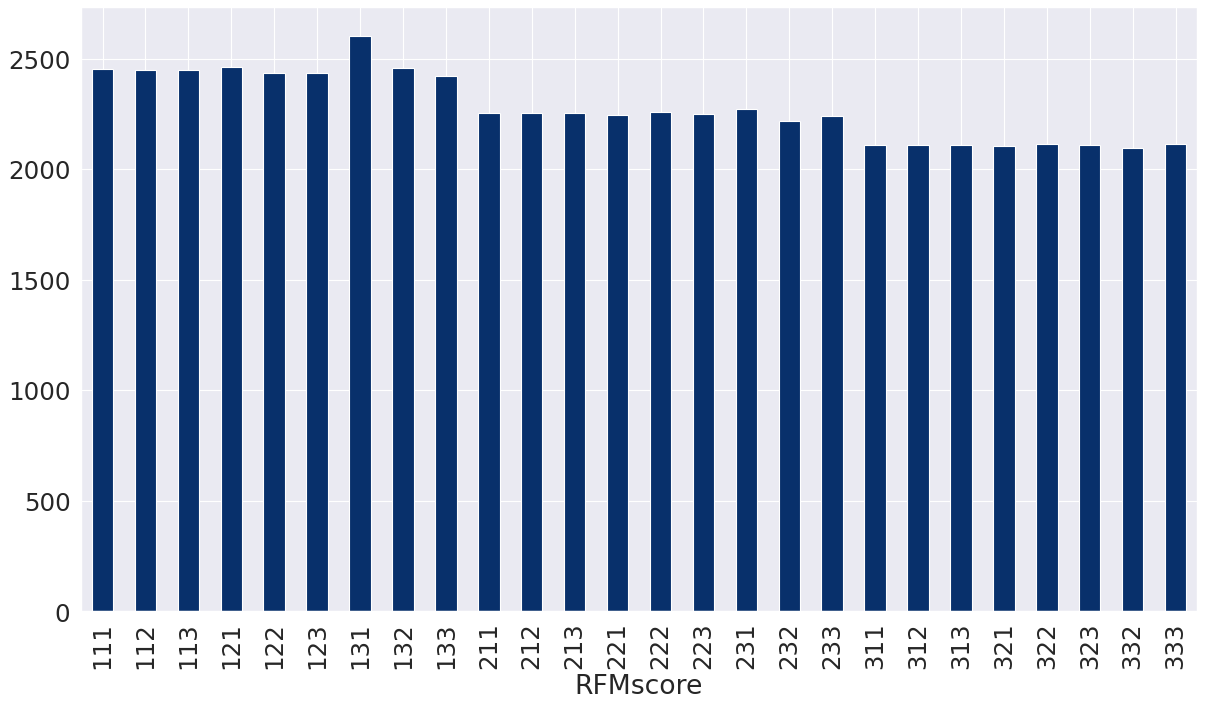

In [87]:
fig=plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
rfm_df.groupby('RFMscore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

Попробуем расписать сегменты в более наглядном виде

In [88]:
rfm_characteristics = pd.DataFrame({'RFMscore': ['111', '112', '113', 
                                '121', '122', '123', 
                                '131', '132', '133', 
                                '211', '212', '213', 
                                '221', '222', '223', 
                                '231', '232', '233', 
                                '311', '312', '313', 
                                '321', '322', '323', 
                                '332', '333'], 
                    'characteristic': ['Потерянные экономные', 'Одноразовые', 'Одноразовые', 
                                       'Уходящие редкие', 'Уходящие редкие', 'Уходящие редкие', 
                                       'Уходящие постоянные', 'Уходящие хорошие постоянные', 'Уходящие VIP', 
                                       'Спящие разовые с маленьким чеком', 'Спящие разовые с маленьким чеком', 'Спящие разовые с маленьким чеком',
                                       'Спящие редкие с маленьким чеком', 'Спящие редкие со средним чеком', 'Спящие редкие с высоким чеком',
                                       'Спящие постоянные с маленьким чеком', 'Спящие постоянные со средним чеком', 'Спящие постоянные с высоким чеком',
                                       'Новички с маленьким чеком', 'Новички со средним чеком', 'Новички с высоким чеком. Потенциальные VIP',
                                       'Постоянные с маленьким чеком', 'Постоянные со средним чеком', 'Постоянные с высоким чеком',
                                       'Постоянные со средним чеком', 'VIP']})

In [89]:
rfm_df_char = rfm_df.merge(rfm_characteristics, how = 'left', on = 'RFMscore')

In [90]:
rfm_df_char.head()

,customer_unique_id,recency,frequency,monetary,r_segment,f_segment,m_segment,RFMscore,characteristic
0,0000366f3b9a7992bf8c76cfdf3221e2,2146,1,129.90,3,1,3,313,Новички с высоким чеком. Потенциальные VIP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2149,1,18.90,3,1,1,311,Новички с маленьким чеком
2,0000f46a3911fa3c0805444483337064,2572,1,69.00,1,1,2,112,Одноразовые
3,0000f6ccb0745a6a4b88665a16c9f078,2356,1,25.99,1,1,1,111,Потерянные экономные
4,0004aac84e0df4da2b147fca70cf8255,2323,1,180.00,1,1,3,113,Одноразовые


In [96]:
segmentation=rfm_df_char.groupby('characteristic', as_index=False)  \
                .agg({'customer_unique_id':'count'}) \
                .rename(columns={'customer_unique_id':'count_customer'}) \
                .sort_values('count_customer', ascending=False)
segmentation

,characteristic,count_customer
12,Спящие разовые с маленьким чеком,29878
4,Одноразовые,20650
8,Потерянные экономные,10336
1,Новички с высоким чеком. Потенциальные VIP,9938
2,Новички с маленьким чеком,9879
3,Новички со средним чеком,9876
18,Уходящие редкие,765
13,Спящие редкие с высоким чеком,627
5,Постоянные с высоким чеком,608
7,Постоянные со средним чеком,249


In [97]:
fig = px.treemap(segmentation, path=['characteristic'], values='count_customer')
fig.update_layout(title="Tree map of Segments", width=700, height=500,)
fig.show()